Let's load the MNIST dataset. We would need to install the `torchvision` package (e.g, `pip install torchvision`), additionally to the `torch` package

In [11]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from matplotlib import pyplot as plt


In [12]:
# Download training data from open datasets.
train_data = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
)

Let's code a function that draws an image from the training dataset

In [13]:
def draw(dataset, idx: int) -> None:
    plt.title(f'label: {dataset.targets[idx].item()}')
    plt.imshow(dataset.data[idx].int())

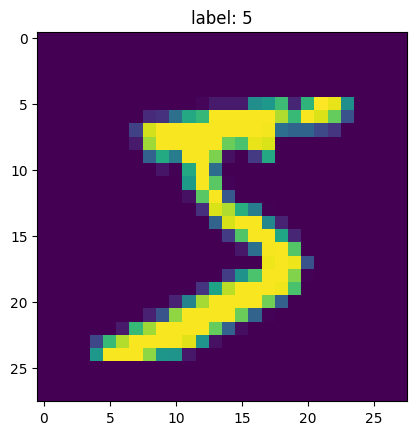

In [14]:
draw(train_data, 0)

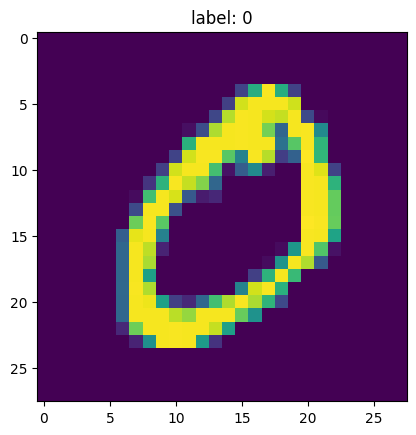

In [15]:
draw(train_data, 1)

Create batched data loaders for the training and the testing datasets   

In [16]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


Check if we have access to a GPU or just using our CPU

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


Let's create the neuran network with 784 (28x28) inputs, 2500 hidden neurons, and 10 output neurons

In [18]:
from model import MNISTModel, SDGOptimizer

model = MNISTModel().to(device)
print(model)

ModuleNotFoundError: No module named 'mlpg'

Let's define our loss function, which is the [CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) one, useful when classifying the dataset to N classes.

In [ ]:
loss_fn = nn.CrossEntropyLoss()

Let's define now the optimizer, which implement a stochastic gradient descent, with learning rate of 0.001.

In [ ]:
optimizer = SDGOptimizer(model.parameters(), lr=1e-3)

torch.nn.parameter.Parameter

Training logic, which perform the forward pass and the backward pass

In [ ]:
epochs = 8
train_size = len(train_dataloader.dataset)
test_size = len(train_dataloader.dataset)
for t in range(epochs):
    print(f'Epoch {t+1}\n-------------------------------')
    for batch, (loss, X, y, pred) in enumerate(model.train_gen(train_dataloader, loss_fn, optimizer)):
        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size
            print(f'loss: {loss:>7f}  [{current:>5d}/{train_size:>5d}]')
    test_loss, correct = model.test_gen(test_dataloader, loss_fn)
    print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n')
print('Done!')

Epoch 1
-------------------------------
loss: 2.302322  [    0/60000]
loss: 2.307468  [ 6400/60000]
loss: 2.299861  [12800/60000]
loss: 2.313809  [19200/60000]
loss: 2.295128  [25600/60000]
loss: 2.295308  [32000/60000]
loss: 2.301622  [38400/60000]
loss: 2.310034  [44800/60000]
loss: 2.305254  [51200/60000]
loss: 2.309676  [57600/60000]
Test Error: 
 Accuracy: 7.3%, Avg loss: 2.303808 

Epoch 2
-------------------------------
loss: 2.302322  [    0/60000]
loss: 2.307468  [ 6400/60000]
loss: 2.299861  [12800/60000]
loss: 2.313809  [19200/60000]
loss: 2.295128  [25600/60000]
loss: 2.295308  [32000/60000]
loss: 2.301622  [38400/60000]
loss: 2.310034  [44800/60000]
loss: 2.305254  [51200/60000]
loss: 2.309676  [57600/60000]
Test Error: 
 Accuracy: 7.3%, Avg loss: 2.303808 

Epoch 3
-------------------------------
loss: 2.302322  [    0/60000]
loss: 2.307468  [ 6400/60000]
loss: 2.299861  [12800/60000]
loss: 2.313809  [19200/60000]
loss: 2.295128  [25600/60000]
loss: 2.295308  [32000/60000

In [ ]:
torch.save(model.state_dict(), 'model.pth')
print('Saved PyTorch Model State to model.pth')

Loading pre-trained models

In [ ]:
model = MNISTModel().to(device)
model.load_state_dict(torch.load('model.pth'))

In [ ]:
def eval_image(model: nn.Module, X: torch.Tensor):
    model.eval()
    with torch.no_grad():
        X = X.to(device)
        pred = model(X)
        return pred.argmax(1).item()

In [ ]:
test_features, test_labels = next(iter(test_dataloader))

eval_image(model, test_features[0])


In [ ]:
draw(test_data, 0)